# cardiovascular disease

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from sklearn.model_selection import train_test_split
%matplotlib inline

In [134]:
data=pd.read_csv(r'C:\Users\נעמיה\OneDrive - Ariel University\Documents\Data sciente\finall project\cardio_train.csv',sep=";")


#### There are 3 types of input features:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.<br><br>
 #### Features:<br>
- Age | Objective Feature | age | int (days)<br>
- Height | Objective Feature | height | int (cm) |<br>
- Weight | Objective Feature | weight | float (kg) |<br>
- Gender | Objective Feature | gender | categorical code |<br>
- Systolic blood pressure | Examination Feature | ap_hi | int |<br>
- Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
- Smoking | Subjective Feature | smoke | binary |<br>
- Alcohol intake | Subjective Feature | alco | binary |<br>
- Physical activity | Subjective Feature | active | binary |<br>
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br><br>
All of the dataset values were collected at the moment of medical examination.<br></font></span></left>

In [135]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


As you can see there are no null values in the data frame. Delete the 'id' feature that does not provide important information.

In [137]:
data=data.drop(columns='id')

<AxesSubplot:xlabel='cardio', ylabel='count'>

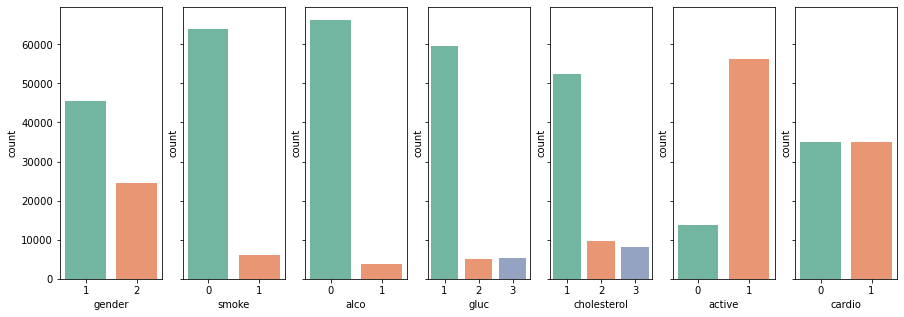

In [138]:
f, axes = plt.subplots(1, 7, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gender',data=data,ax=axes[0],palette="Set2")
sns.countplot(x='smoke',data=data,ax=axes[1],palette="Set2")
sns.countplot(x='alco',data=data,ax=axes[2],palette="Set2")
sns.countplot(x='gluc',data=data,ax=axes[3],palette="Set2")
sns.countplot(x='cholesterol',data=data,ax=axes[4],palette="Set2")
sns.countplot(x='active',data=data,ax=axes[5],palette="Set2")
sns.countplot(x='cardio',data=data,ax=axes[6],palette="Set2")

The 'Age' feature counts age by days. Convert it to age by years.

In [139]:
data['age']=data['age']/365
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [140]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The data show that the ages of the sampled are between 30-65.

There are many entries that need to be cleared or corrected in the data. Unreasonable blood pressure values can be seen, as well as height and weight values.

In [141]:
data.duplicated().sum()

24

In [142]:
data.drop_duplicates(inplace=True) #delete duplicates values.

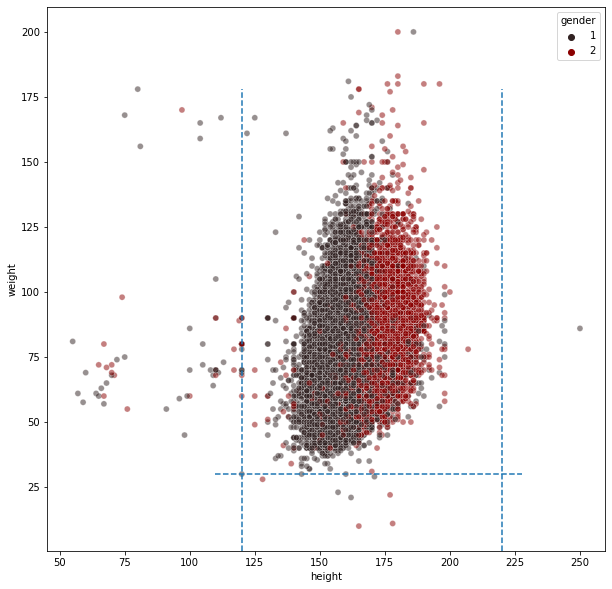

In [143]:
#plot relation height-weight by gender
f, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(data=data, x="height", y="weight",hue='gender',palette="dark:darkred", alpha=0.5)
ax.axvline(120, ls='--',ymax=0.85)
ax.axvline(220, ls='--',ymax=0.85)
ax.axhline(30, ls='--',xmin=0.3,xmax=0.85)

Delete unreasonable height and weight data.

In [144]:
data=data.query('height >= 120 & height <=220 & weight >= 30')

We will add to the data feature 'bmi' according to the following formula:

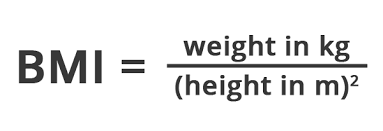

<AxesSubplot:xlabel='bmi', ylabel='Count'>

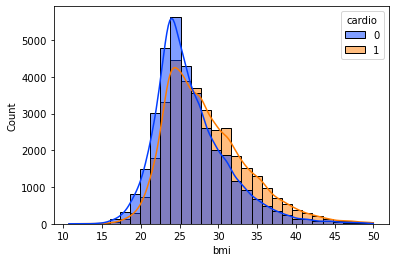

In [151]:
data['bmi'] = data['weight']/((data['height']/100)**2)
sns.histplot(data=data,x='bmi',hue='cardio',kde=True,bins=30,palette='bright')

You can see that there is a higher incidence of heart disease among 'bmi' higher.
Delete unreasonable values:

In [146]:
data=data.query('bmi <= 50')

The following are blood pressure indicators:

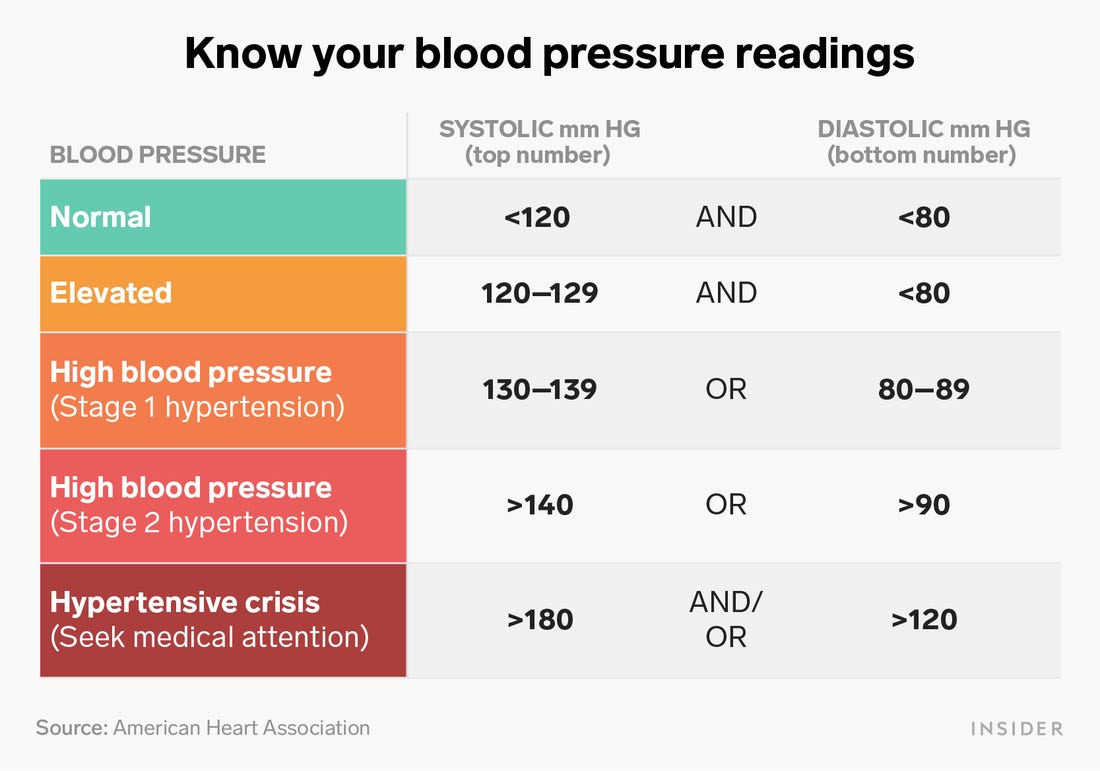

Delete unreasonable values (diastolic higher than systolic, numbers out of measurement range):

In [152]:
data=data.query('70 < ap_hi < 240 & 40 < ap_lo < 180 & ap_hi> ap_lo')

Create 'pressure' feature that rates each person by their blood pressure level:

In [154]:
for index,row in data.iterrows():
    pre=0
    if (row['ap_hi']<120 and row['ap_lo']<80):
            pre=1
    if (120<=row['ap_hi']<130 and row['ap_lo']<80):
            pre=2
    if ((130<=row['ap_hi']<140) or (80<=row['ap_lo']<90)):
            pre=3
    if ((140<=row['ap_hi']<180) or (90<=row['ap_lo']<120)):
            pre=4
    if (row['ap_hi']>=180 or row['ap_lo']>=120):
            pre=5
    data.at[index,'pressure']=pre

Now we will see the correlation between the different features:

<AxesSubplot:>

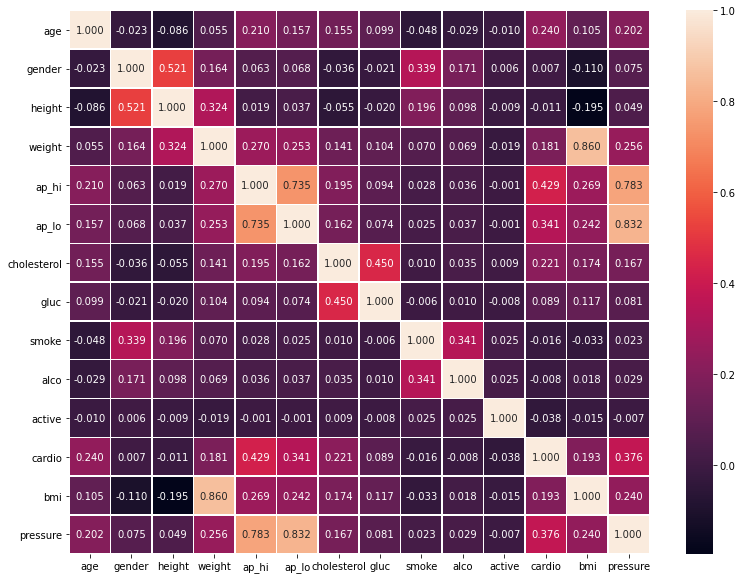

In [158]:
corr = data.corr()
f, ax = plt.subplots(figsize = (13,10))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

It can be seen that the factors that mainly affect the 'cardio' feature are: blood pressure, cholesterol, age and bmi.

In [ ]:
# data['years'] = (data['age'] / 365).round(1).astype('int')
# sns.countplot(x='years', hue='cardio', data = data, palette="Set2")

In [128]:
# data['rel'] =data['ap_lo']/data['ap_hi']
# sns.scatterplot(x='bmi',y='rel',data=data)

# Model

Delete the target label from the dataframe and store it separately:

In [159]:
X = data.drop(['cardio'],axis=1)
y = data['cardio'].copy()

Split the data into a training set and a test set:

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

Before the first model, we will test the dummy model. This model is supposed to give us a perspective on whether the real models we will create are really useful in forecasting or even the dummy gives such a forecast ...

In [161]:
dum=DummyClassifier(strategy='prior')
dum.fit(X_train,y_train)
dum_pre=dum.predict(X_test)
dum.score(X_test,y_test)

0.4986838256800234

Text(0, 0.5, 'Testing Accuracy')

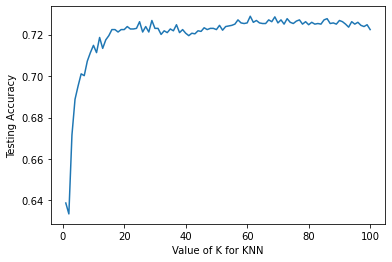

In [162]:
k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [171]:
knn = KNeighborsClassifier(n_neighbors=63)
knn.fit(X_train, y_train)
knn_pre=knn.predict(X_test)
knn.score(X_test,y_test)

0.726820707809301

Text(24.0, 0.5, 'Actually')

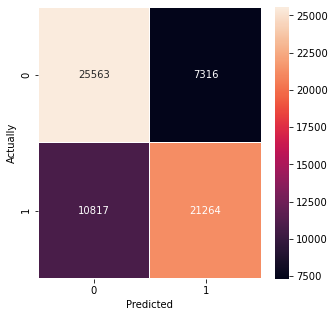

In [173]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)
con=confusion_matrix(y_train, y_train_pred)

#plot confusion_matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con,fmt=".0f", annot=True,linewidths=0.2, ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actually")

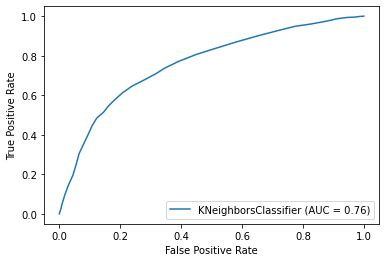

In [60]:
metrics.plot_roc_curve(knn, X_test, y_test) 

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test,knn_pre))

              precision    recall  f1-score   support

           0       0.68      0.77      0.73      1741
           1       0.73      0.63      0.68      1698

    accuracy                           0.70      3439
   macro avg       0.71      0.70      0.70      3439
weighted avg       0.71      0.70      0.70      3439



In [132]:
from sklearn.metrics import f1_score

knn.predict_proba(X_test)

array([[0.96, 0.04],
       [0.88, 0.12],
       [0.68, 0.32],
       ...,
       [0.16, 0.84],
       [0.44, 0.56],
       [0.28, 0.72]])

In [64]:
df['gender']

id
0        2
1        1
2        1
3        2
4        1
        ..
99993    2
99995    1
99996    2
99998    1
99999    1
Name: gender, Length: 69871, dtype: int64

Text(0, 0.5, 'Testing Accuracy')

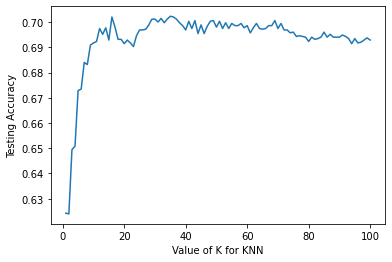

In [46]:
from sklearn import metrics
k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10)

In [90]:
scores

array([0.71238328, 0.7044237 , 0.70212766, 0.7157508 , 0.71544467,
       0.71054646, 0.70503597, 0.71008725, 0.70671973, 0.7072872 ])

<AxesSubplot:xlabel='ap_lo', ylabel='ap_hi'>

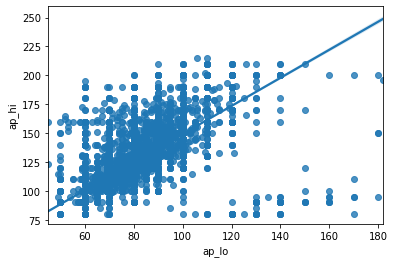

In [37]:
sns.regplot(x='ap_lo',
    y='ap_hi',
    data=data)

In [140]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=500)
log.fit(X_train, y_train)
log.score(X_test,y_test)

0.7198830409356726

Text(24.0, 0.5, 'Actually')

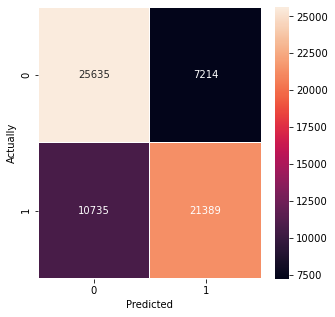

In [141]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(log, X_train, y_train, cv=5)
con=confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con,fmt=".0f", annot=True,linewidths=0.2, ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actually")

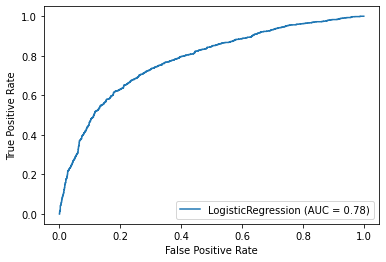

In [142]:
from sklearn import metrics
metrics.plot_roc_curve(log, X_test, y_test) 

In [18]:
0--150

150